# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:   https://www.kaggle.com/datasets/conorsully1/credit-score/data

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# create dataframe of the creadit score transactions csv file
credit_df = pd.read_csv("credit_score.csv")

# display shape of the data (rows x columns)
print("Rows x Columns of the data file =", credit_df.shape,'\n')

# exploring the datatypes, non-null counts, and column names
credit_df.info()
# There are 87 columns. 
# 2 columns are 'object' data type
# 85 columns are numeric 

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Rows x Columns of the data file = (1000, 87) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CUST_ID                  1000 non-null   object 
 1   INCOME                   1000 non-null   int64  
 2   SAVINGS                  1000 non-null   int64  
 3   DEBT                     1000 non-null   int64  
 4   R_SAVINGS_INCOME         1000 non-null   float64
 5   R_DEBT_INCOME            1000 non-null   float64
 6   R_DEBT_SAVINGS           1000 non-null   float64
 7   T_CLOTHING_12            1000 non-null   int64  
 8   T_CLOTHING_6             1000 non-null   int64  
 9   R_CLOTHING               1000 non-null   float64
 10  R_CLOTHING_INCOME        1000 non-null   float64
 11  R_CLOTHING_SAVINGS       1000 non-null   float64
 12  R_CLOTHING_DEBT          1000 non-null   float64
 13  T_EDUCATION_12           1000 no

### What each column is called, followed by what each column means:

CUST_ID: Unique customer identifier

CREDIT_SCORE: Numerical target variable representing the customer's credit score (integer)

DEFAULT: Binary target variable indicating if the customer has defaulted (1) or not (0)

INCOME: Total income in the last 12 months

SAVINGS: Total savings in the last 12 months

DEBT: Total existing debt

R_SAVINGS_INCOME: Ratio of savings to income

R_DEBT_INCOME: Ratio of debt to income

R_DEBT_SAVINGS: Ratio of debt to savings

CATEGORIZED GROUPS : 

GROCERIES, CLOTHING, HOUSING, EDUCATION, HEALTH, TRAVEL, ENTERTAINMENT, GAMBLING, UTILITIES, TAX, FINES 

T_{GROUP}_6: Total expenditure in that group in the last 6 months

T_GROUP_12: Total expenditure in that group in the last 12 months

R_[GROUP]: Ratio of T_[GROUP]6 to T[GROUP]_12

R_[GROUP]INCOME: Ratio of T[GROUP]_12 to INCOME

R_[GROUP]SAVINGS: Ratio of T[GROUP]_12 to SAVINGS

R_[GROUP]DEBT: Ratio of T[GROUP]_12 to DEBT

CATEGORICAL FEATURES:

CAT_GAMBLING: Gambling category (none, low, high)

CAT_DEBT: 1 if the customer has debt; 0 otherwise

CAT_CREDIT_CARD: 1 if the customer has a credit card; 0 otherwise

CAT_MORTGAGE: 1 if the customer has a mortgage; 0 otherwise

CAT_SAVINGS_ACCOUNT: 1 if the customer has a savings account; 0 otherwise

CAT_DEPENDENTS: 1 if the customer has any dependents; 0 otherwise

In [5]:
# Top 5 rows of the data
credit_df.head()

,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,C02COQEVYU,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,...,0.0000,0.0625,High,1,0,0,0,0,444,1
1,C02OZKC0ZF,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,...,0.7692,0.2222,No,1,0,0,1,0,625,0
2,C03FHP2D0A,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,...,1.4286,0.0578,High,1,0,0,1,0,469,1
3,C03PVPPHOY,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,...,1.2500,0.1282,High,1,0,0,1,0,559,0
4,C04J69MUX0,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,...,0.1163,0.0568,High,1,1,1,1,1,473,0


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [99]:
# Get a look at null counts
print("\nPercentage of missing data from each column:\n")
for col in credit_df.columns:
    pct_missing = np.mean(credit_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
# None of the columns have nulls. But do they have zero values instead of nulls?
# Having zero values will effect the columns summary statistics like the mean, median, etc
# but there is no certain way of knowing that as the zero values make sense in these columns.


Percentage of missing data from each column:

CUST_ID - 0%
INCOME - 0%
SAVINGS - 0%
DEBT - 0%
R_SAVINGS_INCOME - 0%
R_DEBT_INCOME - 0%
R_DEBT_SAVINGS - 0%
T_CLOTHING_12 - 0%
T_CLOTHING_6 - 0%
R_CLOTHING - 0%
R_CLOTHING_INCOME - 0%
R_CLOTHING_SAVINGS - 0%
R_CLOTHING_DEBT - 0%
T_EDUCATION_12 - 0%
T_EDUCATION_6 - 0%
R_EDUCATION - 0%
R_EDUCATION_INCOME - 0%
R_EDUCATION_SAVINGS - 0%
R_EDUCATION_DEBT - 0%
T_ENTERTAINMENT_12 - 0%
T_ENTERTAINMENT_6 - 0%
R_ENTERTAINMENT - 0%
R_ENTERTAINMENT_INCOME - 0%
R_ENTERTAINMENT_SAVINGS - 0%
R_ENTERTAINMENT_DEBT - 0%
T_FINES_12 - 0%
T_FINES_6 - 0%
R_FINES - 0%
R_FINES_INCOME - 0%
R_FINES_SAVINGS - 0%
R_FINES_DEBT - 0%
T_GAMBLING_12 - 0%
T_GAMBLING_6 - 0%
R_GAMBLING - 0%
R_GAMBLING_INCOME - 0%
R_GAMBLING_SAVINGS - 0%
R_GAMBLING_DEBT - 0%
T_GROCERIES_12 - 0%
T_GROCERIES_6 - 0%
R_GROCERIES - 0%
R_GROCERIES_INCOME - 0%
R_GROCERIES_SAVINGS - 0%
R_GROCERIES_DEBT - 0%
T_HEALTH_12 - 0%
T_HEALTH_6 - 0%
R_HEALTH - 0%
R_HEALTH_INCOME - 0%
R_HEALTH_SAVINGS - 0%
R_HE

In [2]:
# How many customers have ZERO DEBT
print("There are",(credit_df['DEBT'] == 0).sum(),"customers with ZERO DEBT.")

# How many customers have ZERO SAVINGS
print("There are",(credit_df['SAVINGS'] == 0).sum(),"customers with ZERO SAVINGS.")

# How many customers have ZERO INCOME
print("There are",(credit_df['INCOME'] == 0).sum(),"customers with ZERO INCOME.")

# Are there any customers that have ZERO EXPENDITURE over a span of 12 months
print("There are",(credit_df['T_EXPENDITURE_12'] == 0).sum(),"customers with ZERO EXPENDITURE.")

There are 56 customers with ZERO DEBT.
There are 7 customers with ZERO SAVINGS.
There are 50 customers with ZERO INCOME.
There are 0 customers with ZERO EXPENDITURE.


In [103]:
# Statistical summary of the numeric columns

# Formatting the output of describe() to 2 decimal places
credit_df.describe().apply(lambda s: s.apply('{:.2f}'.format))

# INCOME - $121,610.02 is the average total income over the last 12 mon of the customers with a min of $0 
# and max of $662,094.

# SAVINGS - $413,189.6 is the average savings over the last 12 mon of the customers witha min of $0 
# and max of $2,911,863.

# DEBT - $790,718.05 is the average existing debt of the customers with a min of $0 and max of $5,968,620.

# CREDIT_SCORE - 586.71 is the average credit score of the customers with a min of 300 and a max of 800. 

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,...,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,121610.02,413189.60,790718.05,4.06,6.07,5.87,6822.40,3466.32,0.45,0.06,...,0.94,0.91,0.61,0.94,0.24,0.17,0.99,0.15,586.71,0.28
std,113716.70,442916.04,981790.39,3.97,5.85,16.79,7486.23,5118.94,0.24,0.04,...,0.17,1.63,1.30,0.23,0.42,0.38,0.08,0.36,63.41,0.45
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,300.00,0.00
25%,30450.25,59719.75,53966.75,1.00,1.45,0.21,1084.50,319.50,0.26,0.03,...,0.83,0.16,0.10,1.00,0.00,0.00,1.00,0.00,554.75,0.00
50%,85090.00,273850.50,395095.50,2.55,4.91,2.00,4494.00,1304.00,0.47,0.05,...,0.91,0.33,0.18,1.00,0.00,0.00,1.00,0.00,596.00,0.00
75%,181217.50,622260.00,1193230.00,6.31,8.59,4.51,10148.50,4555.50,0.63,0.07,...,1.00,0.83,0.59,1.00,0.00,0.00,1.00,0.00,630.00,1.00
max,662094.00,2911863.00,5968620.00,16.11,37.00,292.84,43255.00,39918.00,1.06,0.25,...,2.00,10.01,10.01,1.00,1.00,1.00,1.00,1.00,800.00,1.00


In [17]:
#  Review the dataset by categories

# looking at the data of customers who HAVE and HAVE NOT DEFAULTED. 
print(credit_df.groupby("DEFAULT")[['INCOME','SAVINGS','DEBT','CREDIT_SCORE']].mean().round(2))
# There is only a $2200 difference in the AVG INCOME of the customers who have and have not defaulted.
# There is about $250,000 difference in the AVG DEBT.

# cutomers who HAVE and DO NOT HAVE DEBT
print(credit_df.groupby("CAT_DEBT")[['INCOME','SAVINGS','DEBT','CREDIT_SCORE']].mean().round(2))
# Surprisingly customers WITH DEBT have $115,010 more avg income and $395,448 more in avg savings
# compared to the customers WITHOUT DEBT. 
# The credit score difference makes sense. The customers WITH DEBT have lower avg credit score by 54 points. 

# customers WITH and WITHOUT CREDIT_CARD
print(credit_df.groupby("CAT_CREDIT_CARD")[['INCOME','SAVINGS','DEBT','CREDIT_SCORE']].mean().round(2))
# Surprisingly customers WITH CREDIT CARD have $147,627 more avg income and $371,080 more avg savings
# compared to the customers WITHOUT CREDIT CARD.
# The customers WITH CREDIT CARD have $1,536,939 more avg debt and a 34 point lower avg credit score 
# which makes sense.

# customers WITH and WITHOUT MORTGAGE
print(credit_df.groupby("CAT_MORTGAGE")[['INCOME','SAVINGS','DEBT','CREDIT_SCORE']].mean().round(2))
# Interestingly the customers WITH MORTGAGE have $117,062 more avg income, $442,279 more in avg savings
# and only 3 points lower credit score compared to the customers WITHOUT MORTGAGE.
# The customers WITH MORTGAGE have $857,065 more avg debt which is expected.

# customers WITH and WITHOUT SAVINGS_ACCOUNT
print(credit_df.groupby("CAT_SAVINGS_ACCOUNT")[['INCOME','SAVINGS','DEBT','CREDIT_SCORE']].mean().round(2))
# The customers WITH SAVINGS have $448,263 more avg debt and almost 100 points higher credit score 
# which is surprising.
# The customers WITHOUT SAVINGS have $101,784 lower avg income which is expected.

# customers WITH and WITHOUT DEPENDENTS
print(credit_df.groupby("CAT_DEPENDENTS")[['INCOME','SAVINGS','DEBT','CREDIT_SCORE']].mean().round(2))
# Customers WITH DEPENDENTS are earning $66,290 more on avg, saving twice more and are about $971,969 
# higher in debt on avg. 
# Customers WITHOUT DEPENDENTS have higher credit score by 27 points, probably because they have much 
# lower debt. The difference of avg debt is HUGE.

# customers WITH and WITHOUT GAMBLING 
print(credit_df.groupby("CAT_GAMBLING")[['INCOME','SAVINGS','DEBT','CREDIT_SCORE']].mean().round(2))
# Its surprising that customers WITH HIGH GAMBLING have $185,105 higher savings on avg. They also earn 
# more, have lower credit score and atleast twice as high in debt.
# Its interesting to note that the customers WITH LOW GAMBLING have a lot lower debt than the customers
# who don't gamble at all.

            INCOME    SAVINGS       DEBT  CREDIT_SCORE
DEFAULT                                               
0        120990.20  415296.43  719916.64        600.01
1        123172.65  407878.01  969217.37        553.19
             INCOME    SAVINGS       DEBT  CREDIT_SCORE
CAT_DEBT                                               
0          13040.23   39886.43       0.00        637.45
1         128050.60  435334.70  837625.05        583.70
                    INCOME    SAVINGS        DEBT  CREDIT_SCORE
CAT_CREDIT_CARD                                                
0                 87950.02  325614.63   428000.51        594.70
1                230577.15  696694.98  1964939.20        560.85
                 INCOME    SAVINGS        DEBT  CREDIT_SCORE
CAT_MORTGAGE                                                
0             101358.22  336675.35   642445.91        586.19
1             218420.65  778954.23  1499510.27        589.19
                        INCOME    SAVINGS       DEBT  CR

In [3]:
# The following will groupby by how many

print(credit_df['DEFAULT'].value_counts())
# 28.4% of customers DEFAULTED.

print(credit_df['CAT_GAMBLING'].value_counts())
# 62% of customers DO NOT GAMBLE AT ALL.

print(credit_df['CAT_DEPENDENTS'].value_counts())
# Only 15% of customers HAVE DEPENDENTS

print(credit_df['CAT_SAVINGS_ACCOUNT'].value_counts())
# 99.3% of customers HAVE SAVINGS ACCOUNT
# Almost all customers save.

print(credit_df['CAT_MORTGAGE'].value_counts())
# Only 17.3% of customers HAVE MORTGAGE

print(credit_df['CAT_CREDIT_CARD'].value_counts())
# Only 23.6% of customers HAVE CREDIT CARD
# Only a quarter of the customers use credit card.

print(credit_df['CAT_DEBT'].value_counts())
# 94.4% of customers HAVE DEBT. 
# But only 23.6% have credit card and 17.3% have mortgage. There must be other things that
# the customers must have taken a loan on (like car or personal loan) which is not part of this dataset.
# OR the debt is accumulated over a long period of time.

DEFAULT
0    716
1    284
Name: count, dtype: int64
CAT_GAMBLING
No      620
High    264
Low     116
Name: count, dtype: int64
CAT_DEPENDENTS
0    850
1    150
Name: count, dtype: int64
CAT_SAVINGS_ACCOUNT
1    993
0      7
Name: count, dtype: int64
CAT_MORTGAGE
0    827
1    173
Name: count, dtype: int64
CAT_CREDIT_CARD
0    764
1    236
Name: count, dtype: int64
CAT_DEBT
1    944
0     56
Name: count, dtype: int64


In [104]:
# Explore the spending and financial choices of the customers with TOP 100 HIGHEST CREDIT SCORE of this dataset.

# Retrieves the top 100 rows that have the highest "CREDIT_SCORE" values sorted in descending order.
top100_df = credit_df.nlargest(100, "CREDIT_SCORE")

# How many of these High Credit_Score customers choose Debt, Credit Card, Mortgage, Savings and have Dependents
print(top100_df[['CAT_DEBT','CAT_CREDIT_CARD','CAT_MORTGAGE','CAT_SAVINGS_ACCOUNT','CAT_DEPENDENTS']].sum())

# Formatting the output of describe() to 2 decimal places
top100_df.describe().apply(lambda s: s.apply('{:.2f}'.format))

# Statistical summary of the customers with TOP 100 HIGHEST CREDIT SCORE

# Income:
# Average income is $130,789.18, with a min of $0 and max of $557,523.
# Savings:
# Average savings is $490,316.09, with a min of $0 and max of $2,911,863
# Debt:
# Average debt is $383,987.68, with a min of $0 and max of $3,229,943

# It is intersting to note that the avg debt is over 3 times higher than the avg income and 
# the avg savings is higher than the avg debt of the good credit score people.

# CREDIT_SCORE:
# Average Credit Score is 676.87, with a min of 655 and max of 800

# Among these 100 customers, 
    # - 99 have Savings Account
    # - 80 have Debt (Most have debt yet they have good credit scores)
    # - 24 have Mortgage 
    # - 8 have Credit Card (interesting that only 8 of them have credit card)
    # - 8 have Dependents

CAT_DEBT               80
CAT_CREDIT_CARD         8
CAT_MORTGAGE           24
CAT_SAVINGS_ACCOUNT    99
CAT_DEPENDENTS          8
dtype: int64


,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,130789.18,490316.09,383987.68,4.78,1.44,0.81,6175.57,3213.47,0.40,0.04,...,0.98,1.10,1.52,0.80,0.08,0.24,0.99,0.08,676.87,0.08
std,146688.84,545306.61,678470.87,4.46,1.67,1.67,8276.56,5644.09,0.25,0.03,...,0.23,2.00,2.13,0.40,0.27,0.43,0.10,0.27,22.57,0.27
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,...,0.67,0.07,0.00,0.00,0.00,0.00,0.00,0.00,655.00,0.00
25%,15667.00,27400.75,6115.75,0.92,0.10,0.03,464.50,79.75,0.18,0.02,...,0.83,0.12,0.31,1.00,0.00,0.00,1.00,0.00,661.75,0.00
50%,48761.50,346486.00,39742.00,2.86,0.82,0.14,1976.00,669.00,0.41,0.04,...,1.00,0.29,0.84,1.00,0.00,0.00,1.00,0.00,672.00,0.00
75%,240904.75,652398.75,500605.75,8.09,2.35,1.11,10484.75,3705.00,0.60,0.06,...,1.00,1.03,1.67,1.00,0.00,0.00,1.00,0.00,684.50,0.00
max,557523.00,2911863.00,3229943.00,14.44,7.00,14.29,41469.00,29157.00,1.00,0.14,...,2.00,10.00,10.00,1.00,1.00,1.00,1.00,1.00,800.00,1.00


In [40]:
# Explore the spending and financial choices of the customers with BOTTOM 100 LOWEST CREDIT SCORE.

# Retrieves the bottom 100 rows that have the lowest "CREDIT_SCORE" values sorted in ascending order.
bottom100_df = credit_df.nsmallest(100, "CREDIT_SCORE")

# How many of these Low Credit_Score customers choose Debt, Credit Card, Mortgage, Savings and have Dependents
print(bottom100_df[['CAT_DEBT','CAT_CREDIT_CARD','CAT_MORTGAGE','CAT_SAVINGS_ACCOUNT','CAT_DEPENDENTS']].sum())

# Formatting the output of describe() to 2 decimal places
bottom100_df.describe().apply(lambda s: s.apply('{:.2f}'.format))

# Statistical summary of the customers with BOTTOM 100 LOWEST CREDIT SCORE
# Income:
# Average income is $95,744.35, with a min of $0 and max of $483,918
# Savings:
# Average savings is $366,515.91, with a min of $0 and max of $2,479,635
# Debt:
# Average debt is $1,274,407.70, with a min of $4,802 and max of $5,501,471

# It is interesting that the customers with bad credit score have 6 figures in avg savings and the
# avg debt is in 7 figures.

# CREDIT_SCORE:
# Average Credit Score is 454.21, with a min of 300 and max of 506

# Among these 100 customers, 
    # - 96 have Savings Account (Surprising that so many with bad credit score having savings account, maybe no money in the account)
    # - 100 have Debt 
    # - 18 have Mortgage (expected that more customers would have mortgage to rack up a bad credit score)
    # - 37 have Credit Card (surprising that not even half of them with bad credit score have credit cards)
    # - 28 have Dependents

CAT_DEBT               100
CAT_CREDIT_CARD         37
CAT_MORTGAGE            18
CAT_SAVINGS_ACCOUNT     96
CAT_DEPENDENTS          28
dtype: int64


,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,95744.35,366515.91,1274407.70,2.62,17.72,27.17,4284.38,2404.47,0.47,0.04,...,1.00,1.43,0.09,1.00,0.37,0.18,0.96,0.28,454.21,0.64
std,123657.90,569433.49,1344529.94,2.88,7.16,44.46,7028.35,5187.88,0.23,0.03,...,0.15,1.99,0.09,0.00,0.49,0.39,0.20,0.45,51.31,0.48
min,0.00,0.00,4802.00,0.00,7.10,0.00,0.00,0.00,0.00,0.00,...,0.67,0.00,0.03,1.00,0.00,0.00,0.00,0.00,300.00,0.00
25%,12391.75,8307.00,220189.75,0.45,12.25,2.79,414.75,106.75,0.28,0.03,...,0.91,0.25,0.05,1.00,0.00,0.00,1.00,0.00,419.50,0.00
50%,30187.50,23037.00,611602.50,1.04,16.32,6.93,1244.50,569.50,0.51,0.04,...,1.00,0.87,0.06,1.00,0.00,0.00,1.00,0.00,476.00,1.00
75%,149023.75,616561.25,2016249.25,4.34,22.95,29.73,5273.25,2299.75,0.65,0.06,...,1.11,1.67,0.08,1.00,1.00,0.00,1.00,1.00,496.00,1.00
max,483918.00,2479635.00,5501471.00,10.85,37.00,292.84,43255.00,39918.00,1.00,0.20,...,1.33,10.00,0.59,1.00,1.00,1.00,1.00,1.00,506.00,1.00


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

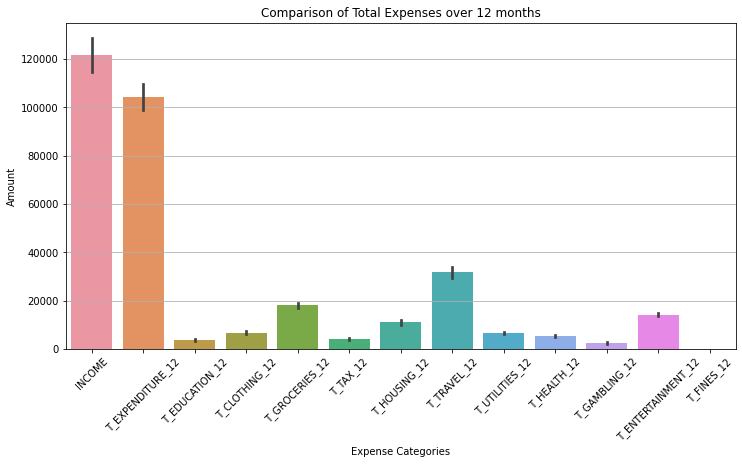

In [4]:
# COMPARING DIFFERENT EXPENSES (total of 12 months) AGAINST THE INCOME

# Its surprising to note that over a span of an year people spent on 'Travel' the most, followed by 
# 'Groceries' and 'Entertainment', and then by 'Housing'.

# Create dataframe with all the expenses columns and the income column
expenses_df = credit_df[['INCOME','T_EXPENDITURE_12','T_EDUCATION_12','T_CLOTHING_12','T_GROCERIES_12',
                   'T_TAX_12','T_HOUSING_12','T_TRAVEL_12','T_UTILITIES_12','T_HEALTH_12',
                   'T_GAMBLING_12','T_ENTERTAINMENT_12','T_FINES_12']]

# Melt the DataFrame to long format
df_melted = expenses_df.melt(var_name='Category', value_name='Amount')

# Create the grouped bar chart
plt.figure(figsize=(12, 6), facecolor='white')
sns.barplot(data=df_melted, x='Category', y='Amount')

# Adding titles and labels
plt.title('Comparison of Total Expenses over 12 months')
plt.xlabel('Expense Categories')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()

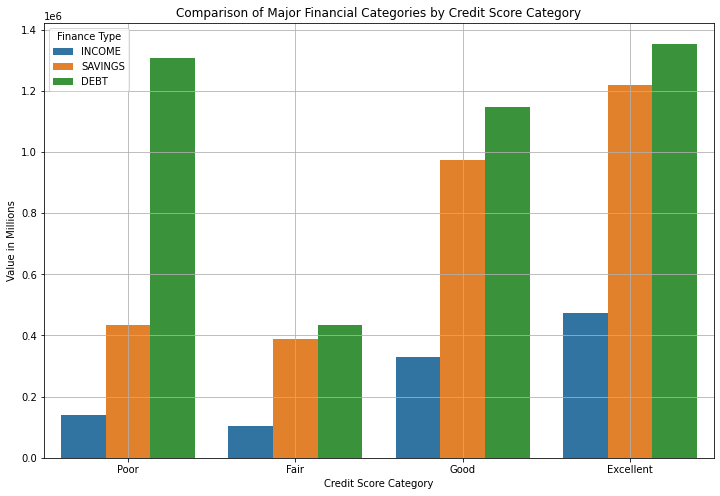

In [15]:
# Compare any trends or reltionships in major financial categories in different credit score categories

# The Debt and Savings being higher than the yearly Income raised questions. The Debt and Savings 
# must have been accumulated over a long period while the Income is for 12 months only.  

# The difference between income/savings and debt is largest in the poor credit score customers.

# a function to categorize the credit scores
def categorize_credit_score(score):
    # Excellent credit history for credit score between 750-850
    if score >= 750:
        return 'Excellent'
    # Strong credit history for credit score between 700-749
    elif score >= 700:
        return 'Good'
    # Fair credit history for credit score between 580-699
    elif score >= 580:
        return 'Fair'
    # Poor credit history for credit score between 300-579
    else:
        return 'Poor'

# Apply the function to the CREDIT_SCORE column
credit_df['CREDIT_SCORE_CATEGORY'] = credit_df['CREDIT_SCORE'].apply(categorize_credit_score)

# create dataframe with just the Income, Savings, Debt and Credit_score_category
finance_df = credit_df[['INCOME','SAVINGS','DEBT','CREDIT_SCORE_CATEGORY']]

# Melt the DataFrame to long format to plot 
finance_melted = finance_df.melt(id_vars=['CREDIT_SCORE_CATEGORY'], 
                                 var_name='Finance Type', value_name='Value')

# Creating an index to act as a bin of size 1000 to hold the 1000 customers data
# for each of the columns
finance_melted['Index'] = finance_melted.index  

# bar plot using seaborn
plt.figure(figsize=(12, 8), facecolor='white')
sns.barplot(data=finance_melted, x='CREDIT_SCORE_CATEGORY', y='Value', hue='Finance Type', ci=None)

# Adding titles and labels
plt.title('Comparison of Major Financial Categories by Credit Score Category')
plt.ylabel('Value in Millions')
plt.xlabel('Credit Score Category')
plt.grid(True)

# Show the plot
plt.show()

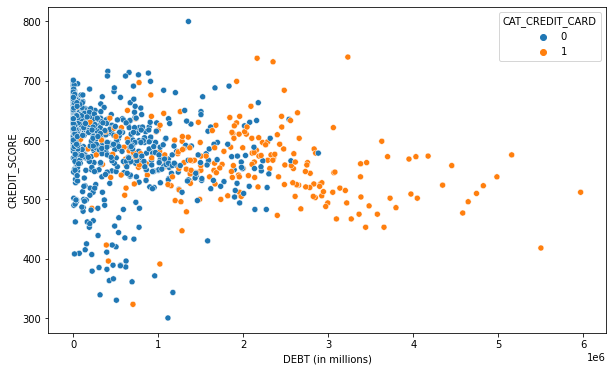

In [108]:
# See what kind of a relationship exists between Debt, Credit_Score and usage of Credit cards

# Scatterplot
plt.figure(figsize=(10, 6), facecolor='white')
sns.scatterplot(x="DEBT", y="CREDIT_SCORE", data=credit_df, hue ='CAT_CREDIT_CARD')
plt.xlabel('DEBT (in millions)')
plt.show()

# From the graph, it can be infered that, most people are concentrated in between mid 500s to mid 
# 600s Credit Score and under 1.5 million dollars Debt. 
# Over 1.5 million dollars of Debt most people have credit cards and under 1.5 million dollars 
# Debt most people dont use credit cards.

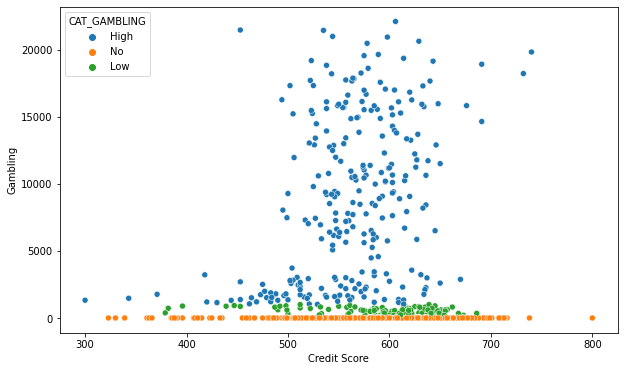

In [17]:
      
# Explore the relationship between money spent on gambling and credit score 
# Majority of the customers hardly gamble.
# The people who gamble highly are between the 500 to 650 credit score customers 

# scatterplot
plt.figure(figsize=(10, 6), facecolor='white')
sns.scatterplot(data=credit_df, x='CREDIT_SCORE', y='T_GAMBLING_12', hue='CAT_GAMBLING')
plt.xlabel('Credit Score')
plt.ylabel('Gambling')
plt.show()


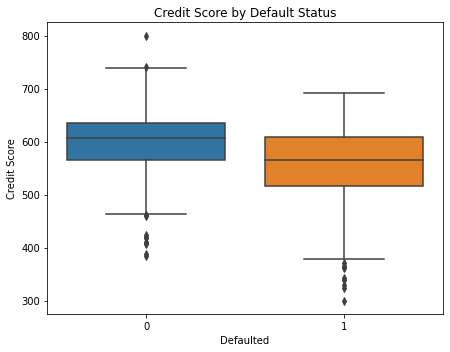

In [21]:
# Visualize the distribution, median, min, max and outliers of credit score column 
# grouped by default status

plt.figure(figsize=(12, 5),facecolor='white')

# Box plot for Credit Score
plt.subplot(1, 2, 2)
sns.boxplot(x='DEFAULT', y='CREDIT_SCORE', data=credit_df)
plt.title('Credit Score by Default Status')
plt.xlabel('Defaulted')
plt.ylabel('Credit Score')
# The box plot shows quite a few OUTLIERS (datapoints outside the whiskers) in the Credit_Score 
# column. 

# Ensure that all components are properly spaced and displayed.
plt.tight_layout()
plt.show()

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
2. Do you have any concerns about your dataset? 
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 

1. There were a couple of things that were surprising, 
Firstly, I was surprised by the amount of ratio columns computed from other columns in the dataset.
Secondly, 94.4% of customers HAVE DEBT. But only 23.6% have credit card and 17.3% have mortgage. The values in the debt column might reflect the values of accumulated debt over a long period of time, or, there must be other things that the customers must have taken a loan on (like car or personal loan) which is not included as part of this dataset.

2.  
a) The box plot graph of credit_score columns show several outliers. I'm unsure how to determine if those datapoints are true outliers or if there is a valid explanation.  
b) It seems unusual for 75% of the customers to not use credit cards and makes me question the validity of the data. Assuming that the data is good, there isnt enough information to explain the absence of credt card usage(For example, there is no data on Debit Cards or Cheques usage by the customers) for tagetted offers and gaining them as customers.  

3. 
a) The dataset doesnt have any null values but has too many columns (1000 rows X 87 columns) and many of those columns can easily be dropped and can be recreated if needed.
b) Wonder if I should change the 1s and 0s into 'True' nd 'False' for all that category columns and the default column.
c) Should figure out how to deal with the outliers shown by the box plot graphs.